In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
# Step 2: Load the Dataset
data = pd.read_csv('train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
# Check for missing values
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
# Step 3: Handle Missing Values
# Fill categorical columns with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Fill numeric column with median
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

# Drop rows with any remaining missing values
data.dropna(inplace=True)


/tmp/ipython-input-5-719536913.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-5-719536913.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [6]:
# Check for missing values
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


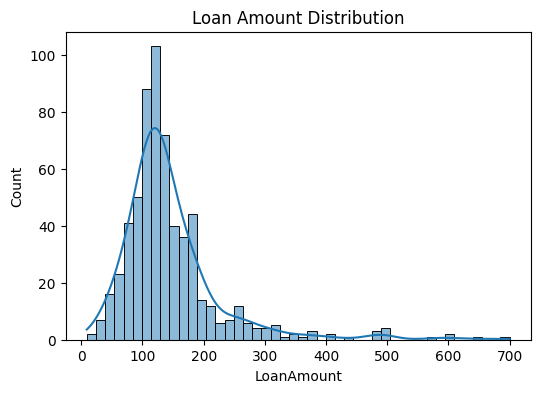

In [7]:
# Histogram: LoanAmount
plt.figure(figsize=(6,4))
sns.histplot(data['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

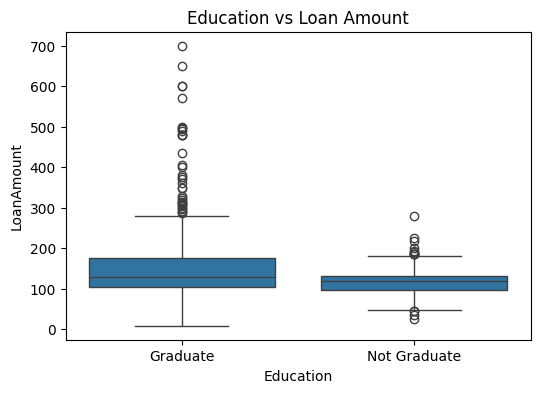

In [8]:

# Boxplot: Education vs LoanAmount
plt.figure(figsize=(6,4))
sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.title('Education vs Loan Amount')
plt.show()

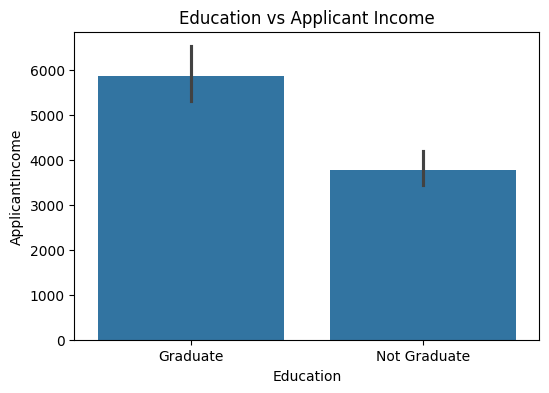

In [9]:

# Bar plot: Education vs Income
plt.figure(figsize=(6,4))
sns.barplot(x='Education', y='ApplicantIncome', data=data)
plt.title('Education vs Applicant Income')
plt.show()

In [10]:
# Data types
print("\nData Types:")
data.dtypes


Data Types:


,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [11]:
# Step 5: Encode Categorical Features
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    data[col] = le.fit_transform(data[col])

# Convert '3+' in Dependents to 3
data['Dependents'].replace('3+', 3, inplace=True)
data['Dependents'] = data['Dependents'].astype(int)

/tmp/ipython-input-11-3316330334.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dependents'].replace('3+', 3, inplace=True)


In [12]:
# Data types
print("\nData Types:")
data.dtypes


Data Types:


,0
Loan_ID,object
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [13]:
# Step 6: Prepare Features and Target
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 7: Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Accuracy: 0.7886178861788617


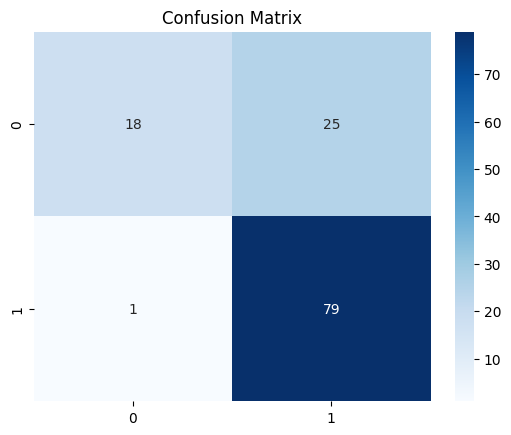

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [15]:
# Step 8: Evaluate the Model
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [16]:
# Step 9: Save the Model
joblib.dump(model, 'credit_risk_model.pkl')
print("Model saved as credit_risk_model.pkl")

Model saved as credit_risk_model.pkl


**Test the Model on test.csv**

In [17]:
# Step 3: Load the test data
test = pd.read_csv('test.csv')
test_original = test.copy()  # for saving predictions with Loan_ID

In [18]:
# Step 4: Preprocess test data (same as training)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    test[col].fillna(test[col].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

# Label encoding for categorical columns
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    test[col] = le.fit_transform(test[col])

# Handle '3+' in Dependents
test['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'] = test['Dependents'].astype(int)

# Drop Loan_ID before prediction
X_test = test.drop(columns=['Loan_ID'])

/tmp/ipython-input-18-4290324996.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].mode()[0], inplace=True)
/tmp/ipython-input-18-4290324996.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [19]:
# Step 2: Load the saved model
model = joblib.load('credit_risk_model.pkl')

In [20]:
# Step 5: Predict Loan Status
predictions = model.predict(X_test)

# Reverse label encoding (0 → N, 1 → Y)
predicted_labels = ['Y' if i == 1 else 'N' for i in predictions]

# Add predictions to original test set
test_original['Loan_Status'] = predicted_labels

In [21]:
# Step 6: Save the output to a new CSV file
test_original[['Loan_ID', 'Loan_Status']].to_csv('test_predictions.csv', index=False)
print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv
